In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [4]:
# Filter for years with Superman characters

Superman = cast[cast['character'].str.contains('Superman')]

# Filter for years with Batman characters

Batman = cast[cast['character'].str.contains('Batman')]

# Merge both dataframes into one using inner merge

Superman_year = pd.merge(Superman, Batman, on='year', how='inner')

In [5]:
print(Superman_year.shape)

(251, 11)


In [6]:
# Groupby year with aggregate counts

Superman_year = Superman_year.groupby(Superman_year.year).agg(['count'])

In [7]:
# Define the Superman year with more Superman characters than Batman characters

Superman_year = Superman_year['n_x'] > Superman_year['n_y']

In [8]:
# Filter for Superman Years and get count

Superman_year[Superman_year['count'] == True].value_counts()

count
True     8
dtype: int64

## How many years have been "Batman years", with more Batman characters than Superman characters?

In [9]:
# Merge both dataframes into one using inner merge

Batman_year = pd.merge(Batman, Superman, on='year', how='inner')

print(Batman_year.shape)

# Groupby year with aggregate counts

Batman_year = Batman_year.groupby(Batman_year.year).agg(['count'])

# Define the Batman year with more Batman characters than Superman characters

Batman_year = Batman_year.n_x > Batman_year.n_y

# Filter for Batman years and get count

Batman_year[Batman_year['count'] == True].value_counts()

(251, 11)


count
True     9
dtype: int64

## Count the number of actor roles for each year and the number of actress roles for each year over the history of film.

In [10]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [11]:
# Total number of actors vs actresses

cast.type.value_counts()

actor      2455335
actress    1179132
Name: type, dtype: int64

In [12]:
# Filter cast table for actors

actor = cast[cast['type'] == 'actor']

# Filter cast table for actresses

actress = cast[cast['type'] == 'actress']

In [18]:
# Groupby actors table

actor_counts = actor.groupby('year').agg({'type':'count'}).sort_values('year', ascending=True)

In [19]:
# Groupby actresses table

actress_counts = actress.groupby('year').agg({'type':'count'}).sort_values('year', ascending=True)

In [22]:
# Rename Columns

actor_counts = actor_counts.rename(columns={'type': 'actors'})
actress_counts = actress_counts.rename(columns={'type': 'actresses'})

In [46]:
# Concatenate Actors and Actresses dataframes

Roles = pd.concat([actor_counts, actress_counts], axis=1)

# Impute missing values with 0

Roles = Roles.fillna(0)

Roles.actresses = Roles.actresses.astype(int)

Roles

,actors,actresses
year,,
1894,2,1
1900,2,0
1905,1,0
1906,14,3
1907,5,0
...,...,...
2021,9,4
2022,18,11
2023,6,5


Text(0, 0.5, 'Count')

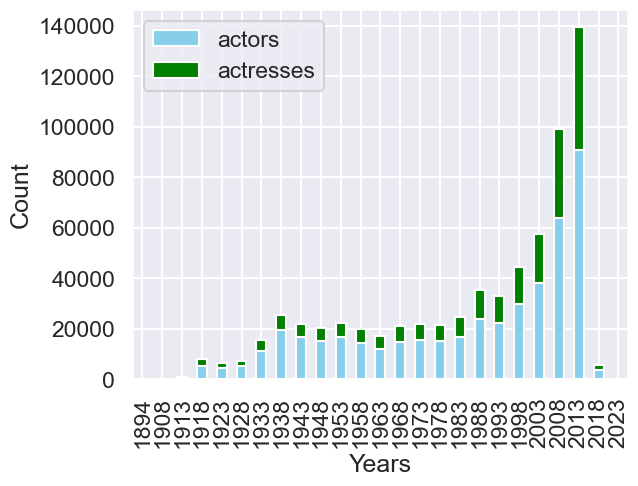

In [47]:
# Plot the counts

sns.set_theme(style='darkgrid', context='talk')

Roles[::5].plot(kind='bar', stacked=True, color=['skyblue', 'green'])

plt.xlabel('Years')
plt.ylabel('Count')

## Find the difference between the number of actor roles and the number of actress roles for each year over the history of film.

In [49]:
# Subtract the total actors from the total actresses by year

Roles['Difference'] = Roles['actors'] - Roles['actresses']

In [57]:
Roles.Difference

year
1894     1
1900     2
1905     1
1906    11
1907     5
        ..
2021     5
2022     7
2023     1
2025     2
2026     1
Name: Difference, Length: 123, dtype: int64

<AxesSubplot: xlabel='year'>

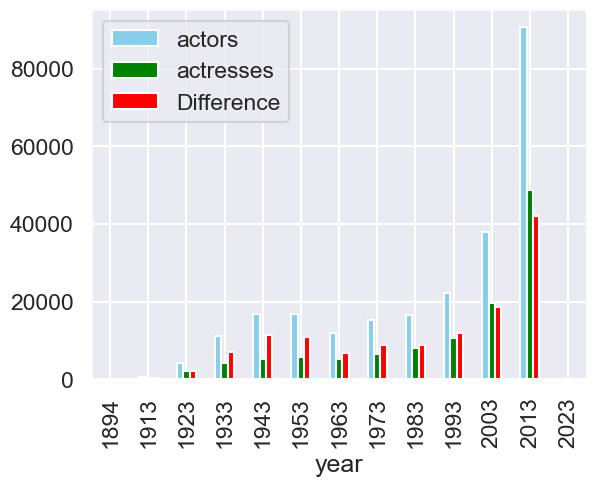

In [56]:
# Plot the differences by year

sns.set_theme(style='darkgrid', context='talk')

Roles[::10].plot(kind='bar', color=['skyblue', 'green', 'red'])

## What is the proportion of roles that have been 'actor' roles for each year in the history of film.

In [60]:
# Create new columns with actor and actress proportions per year

Roles['actor proportion'] = Roles.actors/(Roles.actors + Roles.actresses)
Roles['actress proportion'] = Roles.actresses/(Roles.actresses + Roles.actors)

Roles

,actors,actresses,Difference,actor proportion,actress proportion
year,,,,,
1894,2,1,1,0.666667,0.333333
1900,2,0,2,1.000000,0.000000
1905,1,0,1,1.000000,0.000000
1906,14,3,11,0.823529,0.176471
1907,5,0,5,1.000000,0.000000
...,...,...,...,...,...
2021,9,4,5,0.692308,0.307692
2022,18,11,7,0.620690,0.379310
2023,6,5,1,0.545455,0.454545


## What is the proportion of supporting (n=2) roles that have been 'actor' roles for each year in the history of film.

In [72]:
# Filter cast dataframe for all n=2 supporting roles

Supporting_role = cast[cast['n'] == 2]

# Filter further for only male and female supporting roles

Male_supporting_role = Supporting_role[Supporting_role['type'] == 'actor']
Female_supporting_role = Supporting_role[Supporting_role['type'] == 'actress']

# Group by year and sort values by ascending

Male_counts = Male_supporting_role.groupby('year').agg({'type':'count'}).sort_values('year', ascending=True)
Female_counts = Female_supporting_role.groupby('year').agg({'type':'count'}).sort_values('year', ascending=True)

# Rename columns to avoid matching column names

Male_counts = Male_counts.rename(columns={'type': 'Male Supporting Roles'})
Female_counts = Female_counts.rename(columns={'type': 'Female Supporting Roles'})

# Concatenate both Dataframes

Supporting_Roles = pd.concat([Male_counts, Female_counts], axis=1)

# Impute missing values with zeroes

Supporting_Roles = Supporting_Roles.fillna(0)

# Convert Female Supporting Roles to type integer

Supporting_Roles['Female Supporting Roles'] = Supporting_Roles['Female Supporting Roles'].astype(int)

Supporting_Roles

,Male Supporting Roles,Female Supporting Roles
year,,
1906,2,1
1907,1,0
1908,2,0
1910,2,2
1911,14,5
...,...,...
2016,2337,1823
2017,883,643
2018,41,30


In [77]:
# Get the annual proportions of male and female supporting roles

Supporting_Roles['Male Proportions'] = Supporting_Roles['Male Supporting Roles']/(Supporting_Roles['Male Supporting Roles'] + Supporting_Roles['Female Supporting Roles'])
Supporting_Roles['Female Proportions'] = 1 - Supporting_Roles['Male Proportions']

Supporting_Roles

,Male Supporting Roles,Female Supporting Roles,Male Proportions,Female Proportions
year,,,,
1906,2,1,0.666667,0.333333
1907,1,0,1.000000,0.000000
1908,2,0,1.000000,0.000000
1910,2,2,0.500000,0.500000
1911,14,5,0.736842,0.263158
...,...,...,...,...
2016,2337,1823,0.561779,0.438221
2017,883,643,0.578637,0.421363
2018,41,30,0.577465,0.422535
